In [2]:
import os

import numpy as np

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# 1. Spatial and intensity resolution

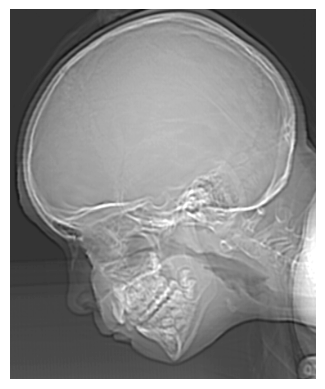

In [3]:
img = Image.open("../../DIP3E_Original_Images_CH02/Fig0221(a)(ctskull-256).tif")
img = np.asarray(img)

plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

In [4]:
img_bin_repr = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_bin_repr.append(np.binary_repr(img[i, j], width = 8))

In [5]:
def func(img, threshold):
    row, col = img.shape
    out_img = np.zeros((row, col))

    for i in range(row):
        for j in range(col):
            if img[i][j] > threshold:
                out_img[i][j] = 255
            else:
                out_img[i][j] = 0

    return out_img

In [6]:
bit_7_img = func(img, 128)
bit_6_img = func(img, 64)
bit_5_img = func(img, 32)
bit_4_img = func(img, 16)
bit_3_img = func(img, 8)
bit_2_img = func(img, 4)
bit_1_img = func(img, 2)

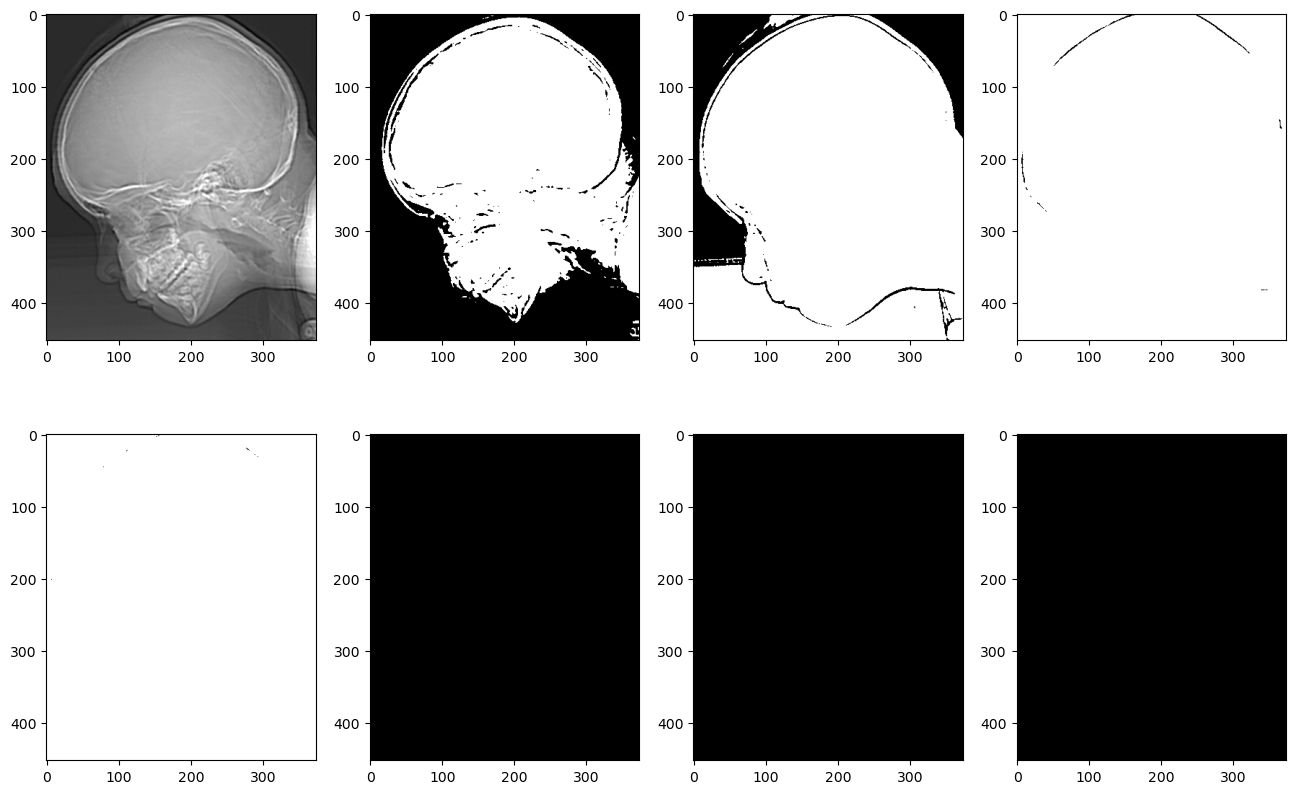

In [7]:
fig, ((ax1, ax2, ax3, ax4),
      (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize = (16, 10))

ax1.imshow(img, cmap = 'gray')
ax2.imshow(bit_7_img, cmap = 'gray')
ax3.imshow(bit_6_img, cmap = 'gray')
ax4.imshow(bit_5_img, cmap = 'gray')

ax5.imshow(bit_4_img, cmap = 'gray')
ax6.imshow(bit_3_img, cmap = 'gray')
ax7.imshow(bit_2_img, cmap = 'gray')
ax8.imshow(bit_1_img, cmap = 'gray')

In [8]:
a = 0
b = 255

def func(img, k):
    row, col = img.shape
    out_img = np.zeros((row, col))

    c = 0
    d = 2**k

    mult = (d - c)/(b - a)

    for i in range(row):
        for j in range(col):
            out_img[i][j] = img[i][j]*mult

    return np.uint8(out_img), c, d - 1

In [9]:
bit_7_img, vmin7, vmax7 = func(img, 7)
bit_6_img, vmin6, vmax6 = func(img, 6)
bit_5_img, vmin5, vmax5 = func(img, 5)
bit_4_img, vmin4, vmax4 = func(img, 4)
bit_3_img, vmin3, vmax3 = func(img, 3)
bit_2_img, vmin2, vmax2 = func(img, 2)
bit_1_img, vmin1, vmax1 = func(img, 1)

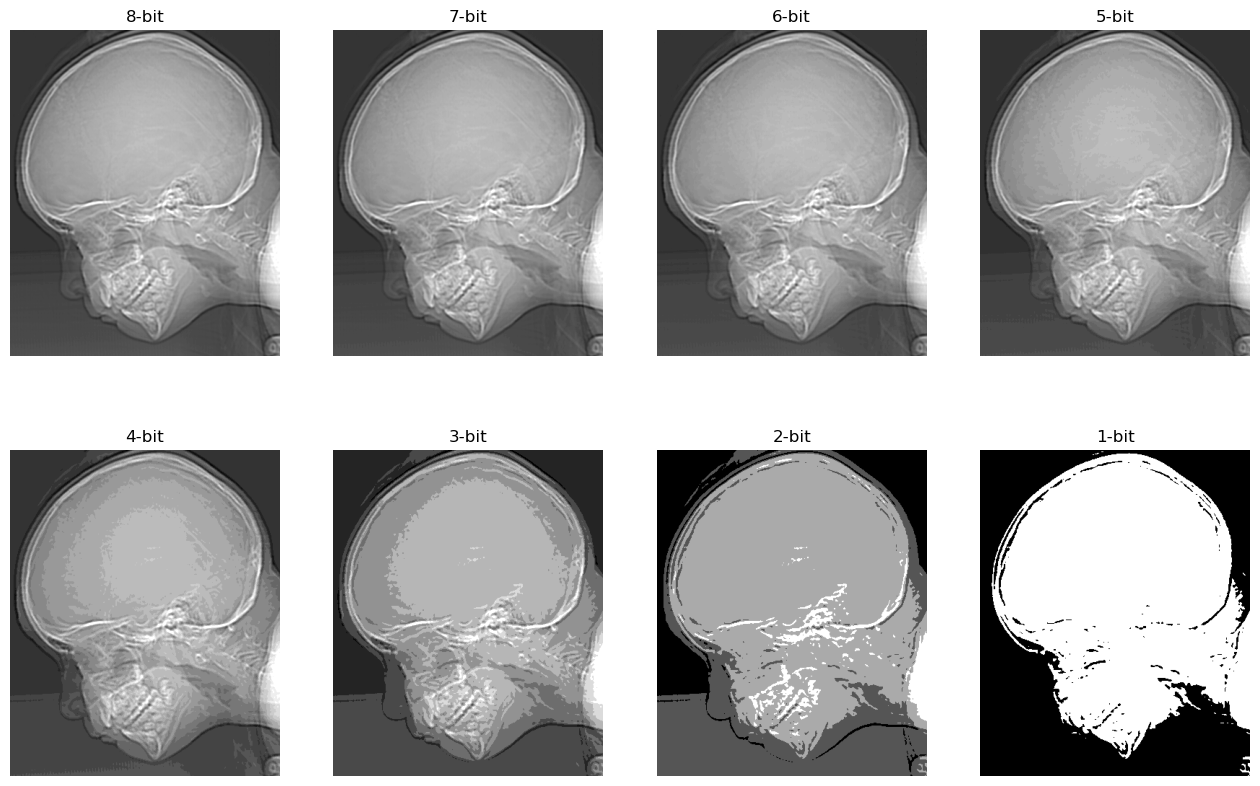

In [30]:
fig, ((ax1, ax2, ax3, ax4),
      (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize = (16, 10))

ax1.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("8-bit")
ax2.imshow(bit_7_img, cmap = 'gray', vmin = vmin7, vmax = vmax7)
ax2.set_title("7-bit")
ax3.imshow(bit_6_img, cmap = 'gray', vmin = vmin6, vmax = vmax6)
ax3.set_title("6-bit")
ax4.imshow(bit_5_img, cmap = 'gray', vmin = vmin5, vmax = vmax5)
ax4.set_title("5-bit")

ax5.imshow(bit_4_img, cmap = 'gray', vmin = vmin4, vmax = vmax4)
ax5.set_title("4-bit")
ax6.imshow(bit_3_img, cmap = 'gray', vmin = vmin3, vmax = vmax3)
ax6.set_title("3-bit")
ax7.imshow(bit_2_img, cmap = 'gray', vmin = vmin2, vmax = vmax2)
ax7.set_title("2-bit")
ax8.imshow(bit_1_img, cmap = 'gray', vmin = vmin1, vmax = vmax1)
ax8.set_title("1-bit")

for axs in ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)):
    for ax in axs:
      ax.axis('off')